# PREDICTION DES RETARDS DE VOL

---

## 1. IMPORT DES LIBRAIRIES

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

---

## 2. CHARGEMENT DES DONNÉES

Nos données sont réparties dans plusieurs fichiers. Nous allons donc, dans un premier temps, travailler avec le premier fichier "2016_01.csv" afin de mieux comprendre et analyser nos données.

Dans un second temps, nous déterminerons s’il est nécessaire ou pertinent de travailler avec les autres fichiers.

**Chargement du dataset "2016_01.csv"**

In [44]:
pd.set_option('display.max_rows', 65)
pd.set_option('display.max_columns', 65)
data = pd.read_csv("data/2016_01.csv")
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 445827 │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 65     │ │ int64       │ 20    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 15    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                             ┃ NA                            ┃ NA %                  ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Unnamed: 64                                        │                        445827 │                   100 │  │
│ └────────────────────────────────────────────────────┴───────────────────────────────┴───────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA     ┃ NA %     ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ YEAR    │      0 │        0 │    2016 │       0 │    2016 │    2016 │    2016 │    2016 │    2016 │     █  │  │
│ │ QUARTER │      0 │        0 │       1 │       0 │       1 │       1 │       1 │       1 │       1 │     █  │  │
│ │ MONTH   │      0 │        0 │       1 │       0 │       1 │       1 │       1 │       1 │       1 │     █  │  │
│ │ DAY_OF_ │      0 │        0 │   15.89 │   8.937 │       1 │       8 │      16 │      24 │      31 │ ▇▇▇▆▇█ │  │
│ │ MONTH   │        │          │         │         │         │         │         │         │         │        │  │
│ │ DAY_OF_ │      0 │        0 │   4.114 │   2.005 │       1 │       2 │       4 │       6 │       7 │ ▄▄▄▄▄█ │  │
│ │ WEEK    │        │          │         │         │         │         │         │         │         │        │  │
│ │ AIRLINE │      0 │        0 │   19900 │   382.9 │   19390 │   19790 │   19800 │   20300 │   21170 │  ▄█ ▅  │  │
│ │ _ID     │        │          │         │         │         │         │         │         │         │        │  │
│ │ FL_NUM  │      0 │        0 │    2079 │    1757 │       1 │     702 │    1594 │    2763 │    7438 │ █▆▂▂▂▁ │  │
│ │ ORIGIN_ │      0 │        0 │   12680 │    1529 │   10140 │   11290 │   12890 │   14030 │   16220 │ ▇▆▆█▆▁ │  │
│ │ AIRPORT │        │          │         │         │         │         │         │         │         │        │  │
│ │ _ID     │        │          │         │         │         │         │         │         │         │        │  │
│ │ ORIGIN_ │      0 │        0 │ 1268000 │  152900 │ 1014000 │ 1129000 │ 1289000 │ 1403000 │ 1622000 │ ▇▆▆█▆▁ │  │
│ │ AIRPORT │        │          │         │         │         │         │         │         │         │        │  │
│ │ _SEQ_ID │        │          │         │         │   

In [55]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


---

## 3. EXPLORATION DES DONNÉES

### Objectif :
- Comprendre du mieux possible nos données
- Développer une premiere stratégie de modélisation 

### Analyse de Forme :
- **Variable target** : ARR_DEL15 
- **Lignes et colonnes** : 445827 lignes et 65 colonnes
- **Types de variables** : Qualitatives : 50, Quantitatives : 15
- **Analyse des valeurs manquantes** :
  - Le dataset est plutot complet. Il y assez peu de valeurs NaN.
  - Seulement 10 colonnes sur 65 ne pourrons pas être utilisés car taux de NaN > 90%

### Analyse de Fond :
- **Visualisation de la target** :
  - 16% d'avions en retard (445827 × 0.16 = 71332.32)
- **Signification des variables** :
- **Relation Variables / Target** :
    
    
    
### Analyse plus détaillée

- **Relation Variables / Variables** :
- **NaN analyse** : 

### hypotheses nulle (H0): 


---

### Analyse de la forme des données

On fait une copie de notre dataset pour conserver le jeu de données initial sous la main

In [45]:
df = data.copy()

On commence par regarder les dimensions de notre dataset

In [46]:
df.shape

(445827, 65)

Nous avons donc : 
- 65 colonnes
- 445827 lignes.

---

Ensuite on regarde le type de nos données

In [47]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of YEAR                       int64
QUARTER                    int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                   object
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
CARRIER                   object
TAIL_NUM                  object
FL_NUM                     int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_FIPS            int64
DEST_STATE_NM             object
DEST_WAC                   int64

<Axes: ylabel='count'>

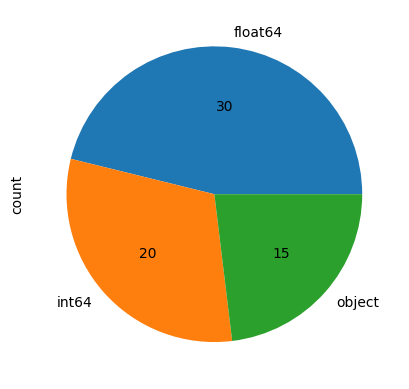

In [ ]:
df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * df.dtypes.value_counts().sum() / 100))

Nous avons donc 
- Qualitatives : (30 + 20) = 50
- Quantitatives : 15

---

On regarde maintenant le taux de valeurs manquantes dans notre dataset à l'aide d'une heatmap

<Axes: >

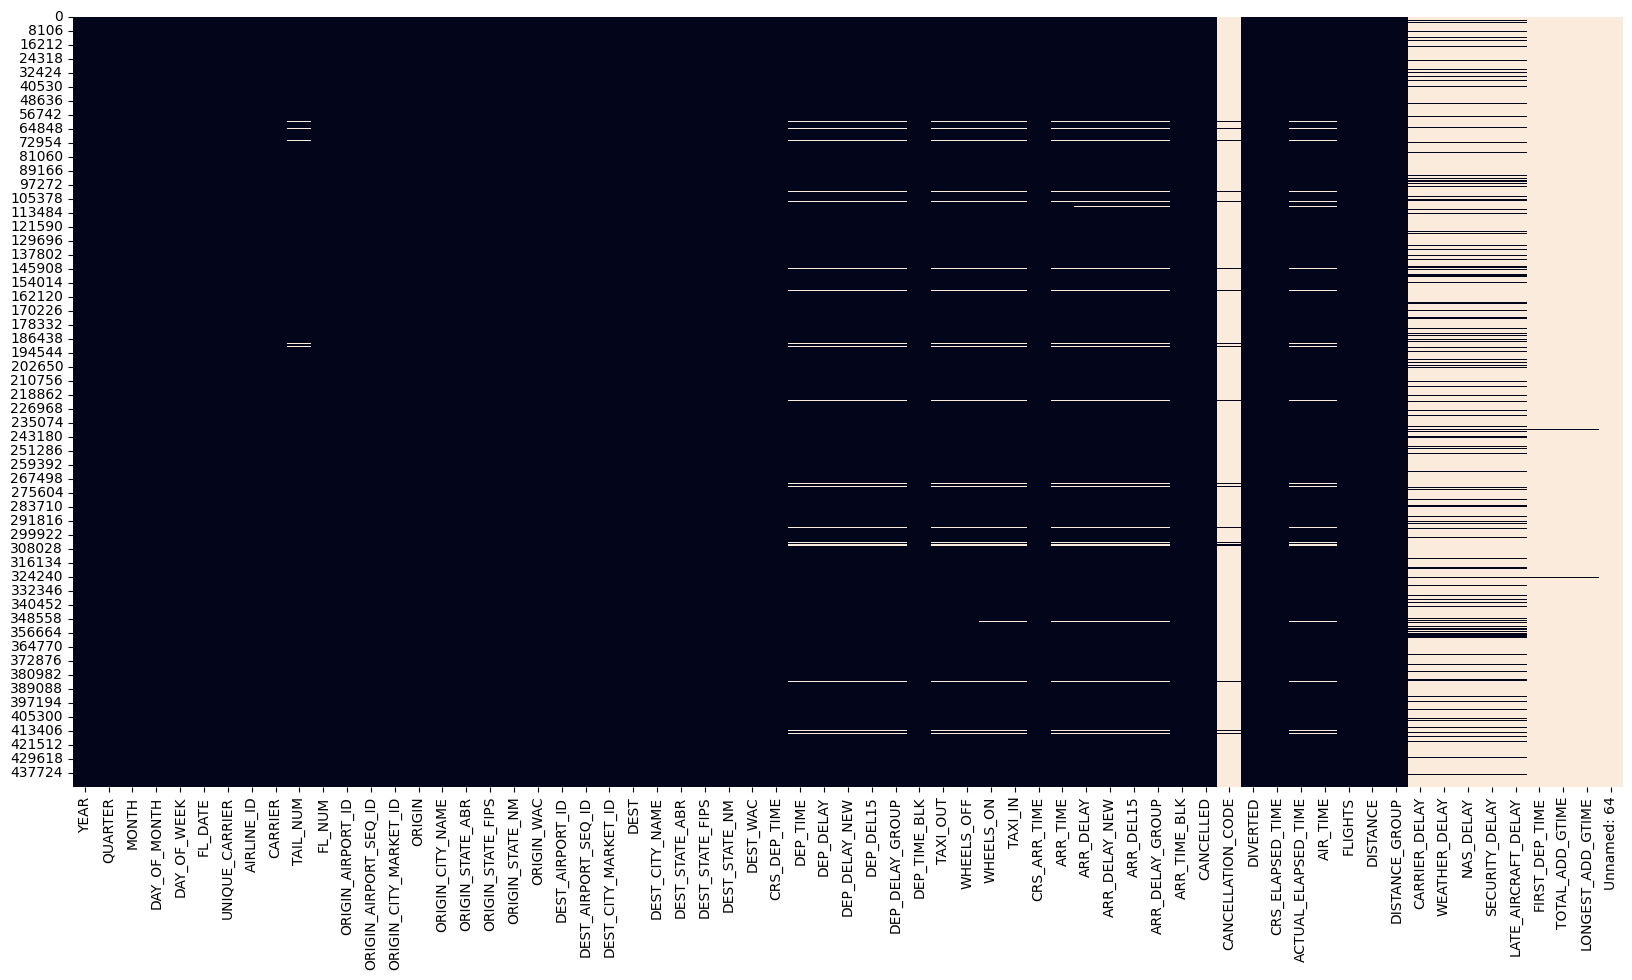

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [50]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

YEAR                     0.000000
QUARTER                  0.000000
MONTH                    0.000000
DAY_OF_MONTH             0.000000
DAY_OF_WEEK              0.000000
FL_DATE                  0.000000
UNIQUE_CARRIER           0.000000
AIRLINE_ID               0.000000
CARRIER                  0.000000
FL_NUM                   0.000000
ORIGIN_AIRPORT_ID        0.000000
ORIGIN_AIRPORT_SEQ_ID    0.000000
ORIGIN                   0.000000
ORIGIN_CITY_MARKET_ID    0.000000
ORIGIN_CITY_NAME         0.000000
ORIGIN_STATE_ABR         0.000000
DEST_CITY_NAME           0.000000
ORIGIN_STATE_FIPS        0.000000
ORIGIN_STATE_NM          0.000000
ORIGIN_WAC               0.000000
DEST_AIRPORT_ID          0.000000
DEST_AIRPORT_SEQ_ID      0.000000
DEST_CITY_MARKET_ID      0.000000
DEST                     0.000000
DEST_WAC                 0.000000
DEST_STATE_ABR           0.000000
DEST_STATE_FIPS          0.000000
DEST_STATE_NM            0.000000
CRS_DEP_TIME             0.000000
CANCELLED     

On peut voir ici 3 groupes de données
- Données manquantes 80 % et plus
- Données manquantes 25% - 30 %
- Données manquantes 0% - 1 %

---

## 4. VISUALISATIONS

### Analyse de fond

On retire les colonnes qui ont un taux de NaN > 80%

In [52]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.8]]

Après analyse de chaques colonnes, il s'avère que certaines informations soient sensibles :
- TAIL_NUM : Peut identifier un avion précis, donc risque de traçage. 
- FL_NUM : Le numéro du vol peut être ok, mais couplé à date + compagnie → risque d’identification précise.

On fait donc le choix de les retirer de notre dataset

In [53]:
df = df.drop('TAIL_NUM', axis=1)
df = df.drop('FL_NUM', axis=1)

In [54]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,158.0,155.0,132.0,1.0,986.0,4
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,158.0,150.0,126.0,1.0,986.0,4
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,0.0,158.0,170.0,135.0,1.0,986.0,4
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,158.0,151.0,129.0,1.0,986.0,4
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,0.0,158.0,171.0,137.0,1.0,986.0,4


---

### Examen de la colonne target

In [56]:
df['ARR_DEL15'].value_counts(normalize=True)

ARR_DEL15
0.0    0.836413
1.0    0.163587
Name: proportion, dtype: float64

---

### Histogrames des variables continues


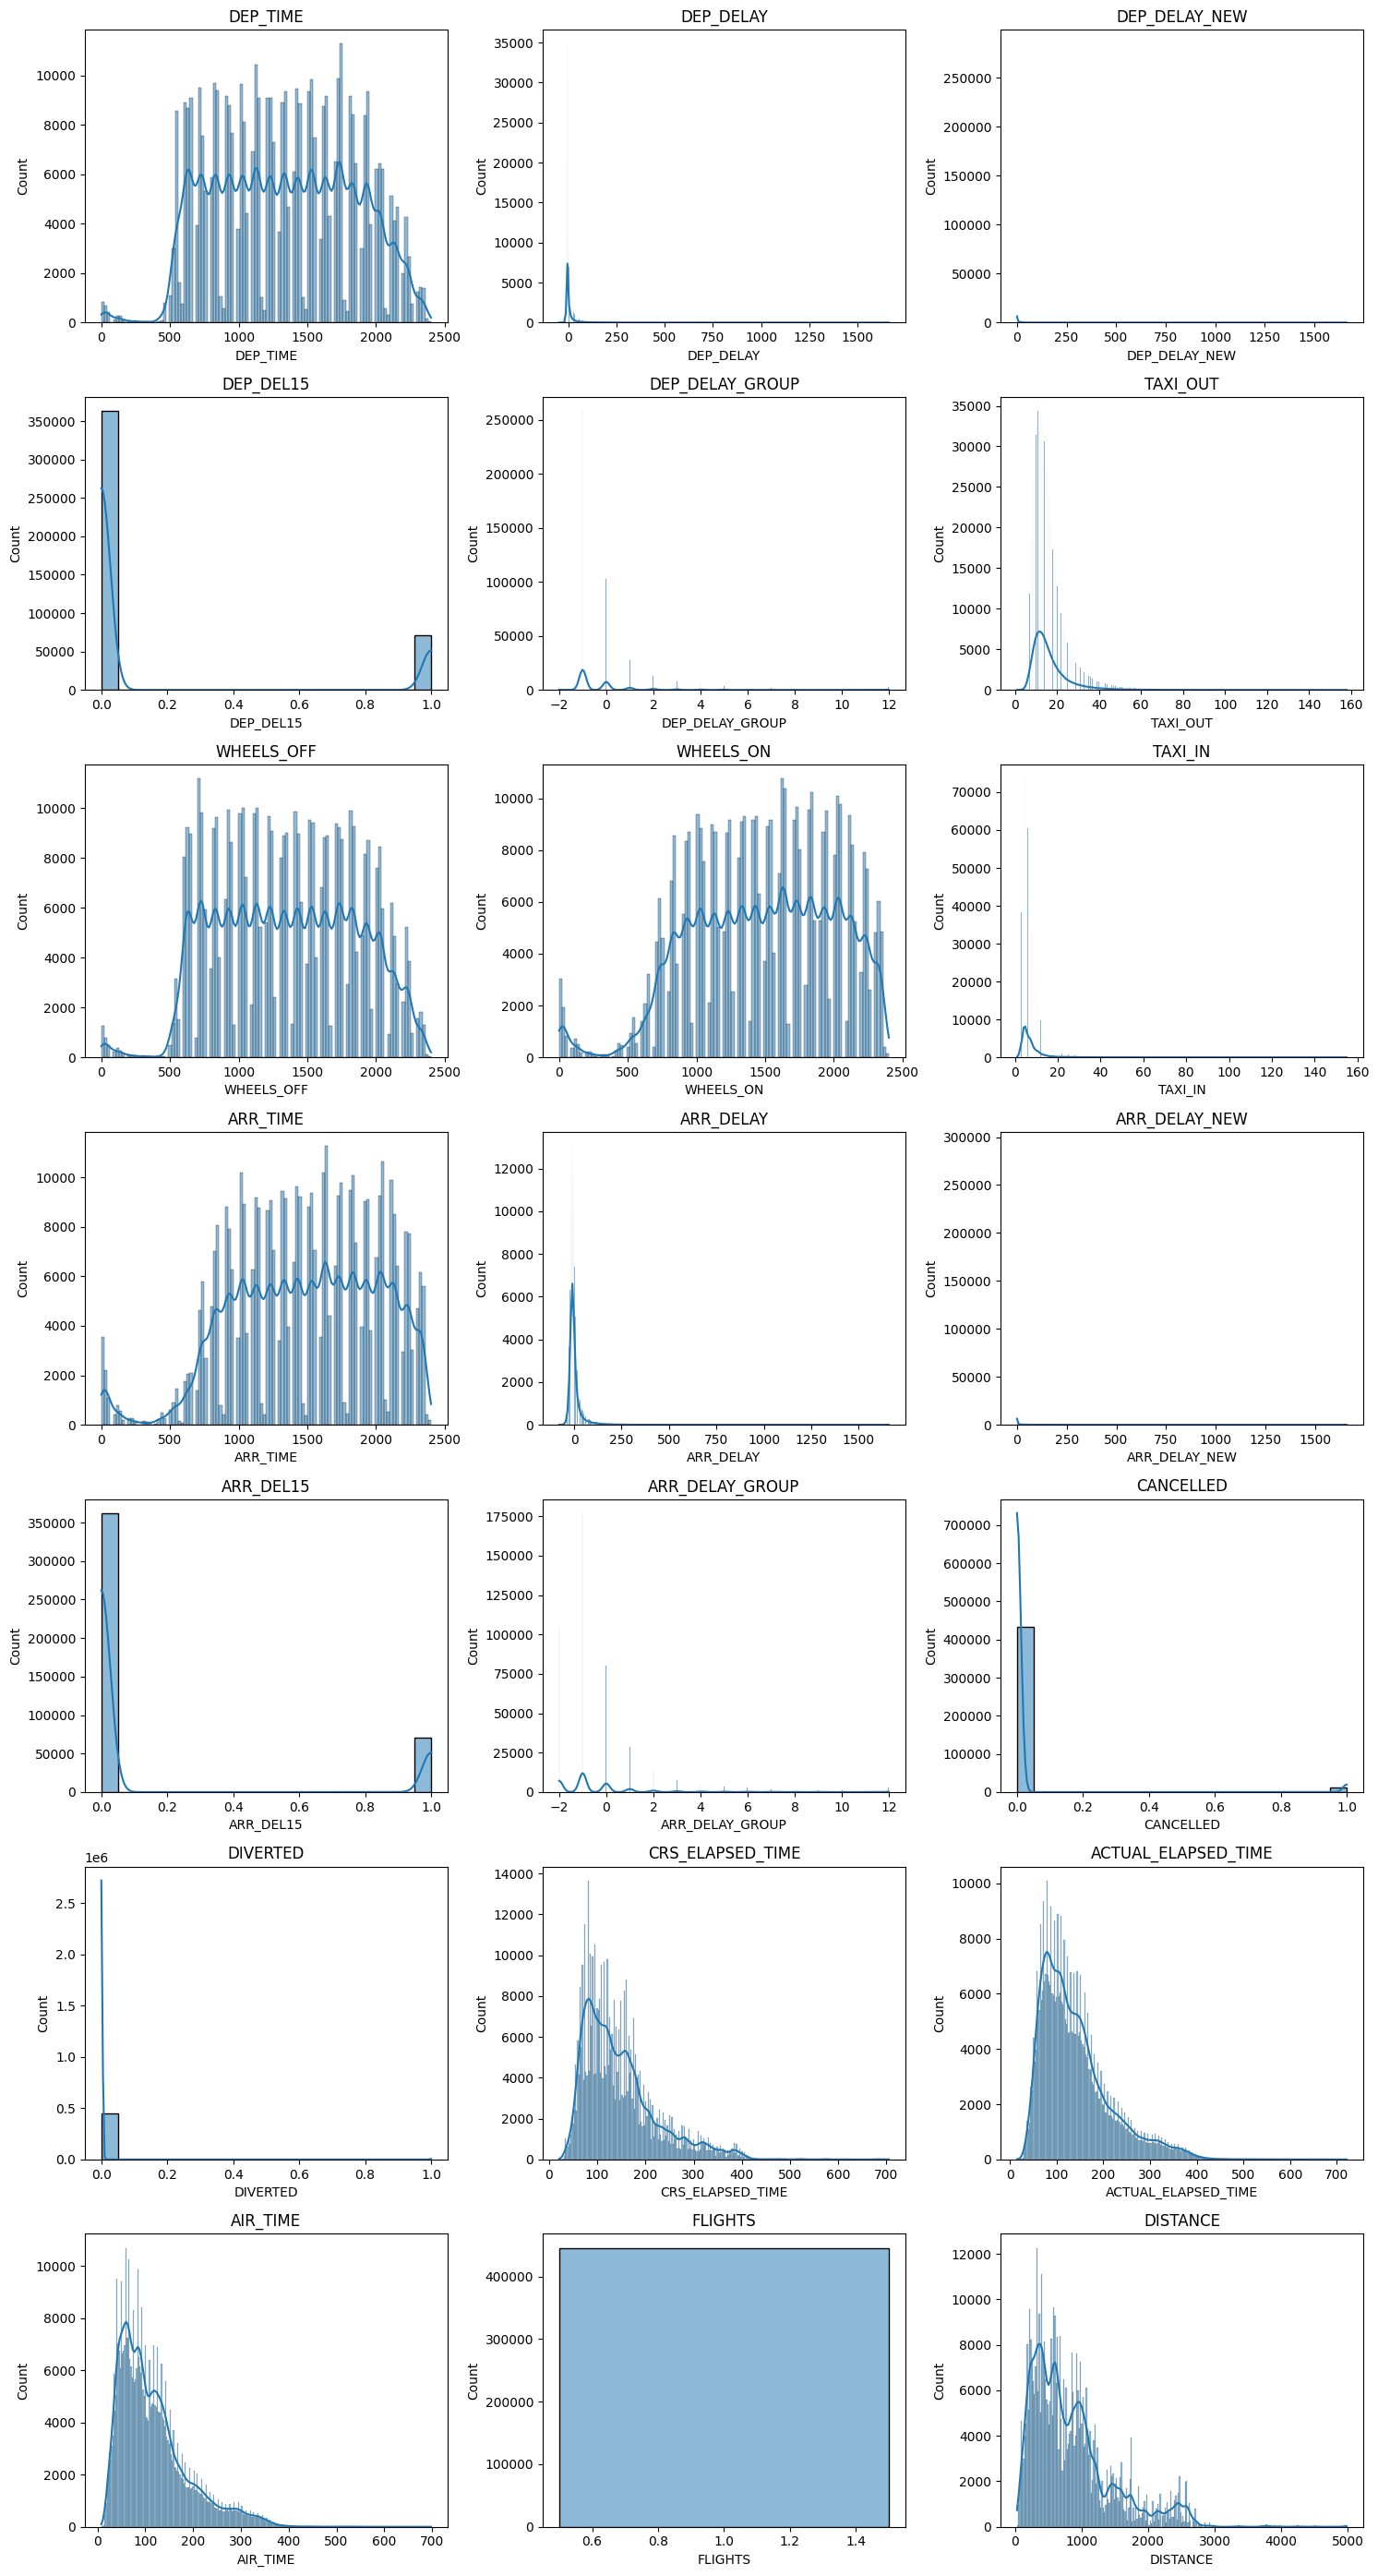

In [61]:
# Select float columns only
float_cols = df.select_dtypes('float').columns

# Set cols per row
n_cols = 3

# Compute necessary row
n_rows = -(-len(float_cols) // n_cols)

# Set grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Aplatis l'objet axes si besoin
axes = axes.flatten()

# Loop on each axes and columns
for ax, col in zip(axes, float_cols):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)

# # Retire les sous-graphiques vides (si le nombre total n'est pas un multiple de 3)
# for i in range(len(float_cols), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

DEP_TIME : 

- La majorité des vols partent entre 500 (5h00) et 2100 (21h00).
- On voit des pics réguliers, cela reflète souvent des plages horaires avec plus de départs programmés (par ex. tôt le matin et fin d’après-midi).
- Le creux entre minuit et 5h00 montre qu’il y a très peu de départs de nuit.

DEP_DELAY : 

- Un pic très marqué autour de 0 indique que beaucoup de vols partent à l’heure ou presque.
- Très peu de vols ont un retard important (au-delà de 100, 200 min, etc.).
- Certains retards extrêmes (> 1000 min) existent mais très rares.

DEP_DEL15 : 

- Variable binaire : indique si le vol a eu un retard ≥ 15 min au départ.
  - 0 = pas de retard significatif
  - 1 = retard ≥ 15 min

- La majorité des vols sont à 0, la plupart n’ont pas eu de gros retard au départ.

DEP_DELAY_GROUP : 
- Variable catégorisant le retard au départ en groupes d’intervalles.
- Pic important vers 0 ou 1, beaucoup de vols à l’heure ou avec peu de retard

TAXI_OUT :

- Temps de roulage entre la porte et la piste avant le décollage (en minutes)
- La majorité des avions roulent moins de 30 min. quelques cas extrêmes de roulage long (> 60 min).

## 5.MODÉLISATION